# PR3C EXTERNO

Simulamos planetesimales a diferentes valores de semieje y vemos cómo evoluciona la excentricidad. Se supone que, en función del semieje, tiendan a la excentricidad forzada, que es proporcional a 1/a.

Luego la comparamos con la excentricidad de escape (Moriwaki 2004), a partir de la cual, cualquier planetesimal con excentricidad mayor a ella, va a ser incapaz de acretar material, por lo tanto no va a poder formar un planeta. 

La excentricidad de escape será proporcional al semieje, por lo tanto, si suponemos que luego de mucho tiempo las excentricidades, en función del semieje, son la excentricidad forzada (una recta decreciente) y solo aquellos semiejes cuya excentricidad forzada sea menor a la de escape (recta creciente) pueden acretar material como para formar planetas, el cruce entre ellas define zonas para las cuales es y no es posible formar planetas por acreción.

In [ ]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

pi = -4*np.arctan(-1)

### PARÁMETROS

In [3]:
N = 200
t_max = 50000  # cantidad de periodos de las binaria
Nout = 100

aB = 1        # a de binarias
eB = 0.1      # e de binarias

mu = 0.2

m1 = 1.
m2 = mu*m1/(1-mu)

a_il = [np.random.rand(1)[0]*aB*40 + aB for i in range(N)]
a_il = np.sort(a_il)


## Simulación de N particulas durante tmax períodos de la binaria. 

#### Nos provee con un archivo de las excentricidades y semiejes finales de cada particula

In [69]:
a_l = np.zeros(N)
e_l = np.zeros(N)

elem = np.zeros((2,N))

for ind in range(N):
    
    sim = rebound.Simulation()
    
    sim.add(m=m1)                                           # primaria
    sim.add(m=m2,a=aB,e=eB,inc=0,l=0,Omega=0,pomega=0)    # secundaria
    
    a_i = a_il[ind]
    
    sim.add(m=0.,a=a_i)                                  # particula
    
    
    # ---------------------- integramos
    
    os = sim.calculate_orbits()
    sim.integrator = "whfast" 
    sim.dt = 0.05 * os[0].P  # 5% del periodo de la orbita mas chica
    Nout = Nout            # number of points to display
    tmax = t_max*os[0].P         # let the simulation run for 8 years
    Nmoons = 2

    times = np.linspace(0.,tmax,Nout)
    ps = sim.particles

    for i,time in enumerate(times):
        sim.integrate(time)
        # note we use integrate() with the default exact_finish_time=1, which changes the timestep near 
        # the outputs to match the output times we want.  This is what we want for a Fourier spectrum, 
        # but technically breaks WHFast's symplectic nature.  Not a big deal here.
        os = sim.calculate_orbits()
     #   print(i,os[1].a)
    
    a_l[ind] = a_i
    e_l[ind] = os[1].e
    
    perc = np.round((ind/(N-1))*100,decimals=1)   #  porcentaje de progreso del programa
    print(str(perc)+'%',end='\r')                   #

elem[0] = a_l
elem[1] = e_l

elem = np.transpose(elem)

open('moriwaki_'+str(t_max)+'.txt', 'w').close()
np.savetxt('moriwaki_'+str(t_max)+'.txt',elem)

### Definimos la función de la excentricidad forzada según Moriwaki (2004)

In [5]:
def e_forced(a):
    f = (5/4)*(1-2*mu)*(aB/a)*eB*(1 + (3/4)*eB*eB)/(1 + (3/2)*eB*eB)
    return(f)

In [6]:
def e_esc(a):
    M = m1+m2
    ro = 1
    m = 1e22
    f = 0.01*((m/1e22)**(1/3))*((ro/1)**(1/6))*((a/10)**(1/2))*((M/1)**(-1/2))
    return(f)

### Gráficos

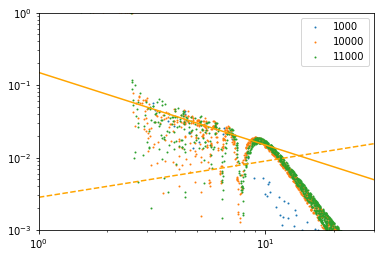

In [7]:
a_l1 = np.genfromtxt('moriwaki_2000.txt',usecols=[0])
e_l1 = np.genfromtxt('moriwaki_2000.txt',usecols=[1])

a_l2 = np.genfromtxt('moriwaki_10000.txt',usecols=[0])
e_l2 = np.genfromtxt('moriwaki_10000.txt',usecols=[1])

a_l3 = np.genfromtxt('moriwaki_11000.txt',usecols=[0])
e_l3 = np.genfromtxt('moriwaki_11000.txt',usecols=[1])

ep = [2*e_forced(i) for i in np.linspace(1,30,100)]
ee = [e_esc(i) for i in np.linspace(1,30,100)]

plt.scatter(a_l1,e_l1,s=1,label='1000')
plt.scatter(a_l2,e_l2,s=1,label='10000')
plt.scatter(a_l3,e_l3,s=1,label='11000')
plt.plot(np.linspace(1,30,100),ep,c='orange')
plt.plot(np.linspace(1,30,100),ee,c='orange',linestyle='dashed')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-3,1)
plt.xlim(1,30)
plt.legend()

## La misma simulación pero para que corra hasta tmax órbitas de la binaria, y cada ~10.000 años escupa archivos con la excentricidad y semieje de cada particula, y así, poder ver la evolución habiendo corrido una vez el código

In [11]:
N = 1000
t_max = 51000  # cantidad de periodos de las binaria
Nout = 500

aB = 1        # a de binarias
eB = 0.1      # e de binarias

mu = 0.2

m1 = 1.
m2 = mu*m1/(1-mu)

a_il = [np.random.rand(1)[0]*aB*40 + aB for i in range(N)]
a_il = np.sort(a_il)

In [12]:
elem_l = []

elem = np.zeros((2,N))

N_t = 5

a_l = np.zeros((N_t,N))
e_l = np.zeros((N_t,N))


for i in range(N_t):
    elem_l.append(np.zeros((2,N)))

for ind in range(N):

    sim = rebound.Simulation()

    sim.add(m=m1)                                           # primaria
    sim.add(m=m2,a=aB,e=eB,inc=0,l=0,Omega=0,pomega=0)    # secundaria

    a_i = a_il[ind]

    sim.add(m=0.,a=a_i)                                  # particula


    # ---------------------- integramos

    os = sim.calculate_orbits()
    sim.integrator = "whfast" 
    sim.dt = 0.05 * os[0].P  # 5% del periodo de la orbita mas chica
    Nout = Nout            # number of points to display
    tmax = t_max*os[0].P
    Nmoons = 2

    times = np.linspace(0,tmax,Nout)
    ps = sim.particles
    
    j = 1
    
    for i,time in enumerate(times):
        sim.integrate(time)
        os = sim.calculate_orbits()
        
#         print(time/os[0].P,j,ind)
    
        if (time/os[0].P >= 1e4*j):
            a_l[j-1][ind] = a_i
            e_l[j-1][ind] = os[1].e
            j += 1
#             print(ind,i,time/os[0].P)

    perc = np.round((ind/(N-1))*100,decimals=1)   #  porcentaje de progreso del programa
    print(str(perc)+'%',end='\r')                   #

for i in range(j):
    elem_l[i][0] = a_l[i]
    elem_l[i][1] = e_l[i]

    elem_l[i] = np.transpose(elem_l[i])

    open('moriwaki_'+str(int(i*1e4))+'.txt', 'w').close()
    np.savetxt('moriwaki_'+str(int(i*1e4))+'.txt',elem_l[i])

IndexError: index 5 is out of bounds for axis 0 with size 5

### Gráficos

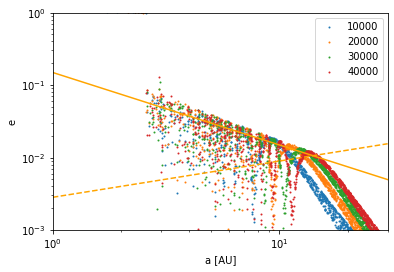

In [8]:
for i in [1,2,3,4]:
    a_l = np.genfromtxt('moriwaki_'+str(int(i*1e4))+'.txt',usecols=[0])
    e_l = np.genfromtxt('moriwaki_'+str(int(i*1e4))+'.txt',usecols=[1])

    plt.scatter(a_l,e_l,s=1,label=str(i*10000))

ep = [2*e_forced(i) for i in np.linspace(1,30,100)]
ee = [e_esc(i) for i in np.linspace(1,30,100)]

plt.plot(np.linspace(1,30,100),ep,c='orange')    
plt.plot(np.linspace(1,30,100),ee,c='orange',linestyle='dashed')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,1)
plt.xlim(1,30)
plt.xlabel('a [AU]')
plt.ylabel('e')

plt.legend()

## La misma simulación pero para sólo 1 particula, y poder ver la evolución temporal de cada parámetro en particular

In [ ]:
t_max_u = 5*15000*365.25

sim = rebound.Simulation()

sim.add(m=m1)                                           # primaria
sim.add(m=m2,a=aB,e=eB,inc=0,l=0,Omega=0,pomega=0)    # secundaria

a_i = a_il[ind]

sim.add(m=0.,a=15)                                  # particula


# ---------------------- integramos

os = sim.calculate_orbits()
sim.integrator = "whfast" 
sim.dt = 0.05 * os[0].P  # 5% del periodo de la orbita mas chica
Nout = 500            # number of points to display
tmax = t_max_u*os[0].P         # let the simulation run for 8 years
Nmoons = 2

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

a_xl = np.zeros(len(times))
e_xl = np.zeros(len(times))

for i,time in enumerate(times):
    sim.integrate(time)
    # note we use integrate() with the default exact_finish_time=1, which changes the timestep near 
    # the outputs to match the output times we want.  This is what we want for a Fourier spectrum, 
    # but technically breaks WHFast's symplectic nature.  Not a big deal here.
    os = sim.calculate_orbits()
 #   print(i,os[1].a)
    a_xl[i] = os[1].a
    e_xl[i] = os[1].e

    perc = np.round((i/(len(times)-1))*100,decimals=1)   #  porcentaje de progreso del programa
    print(str(perc)+'%',end='\r')                   #

elem2 = [times,a_xl,e_xl]
elem2 = np.transpose(elem2)

open('moriwaki_u.txt', 'w').close()
np.savetxt('moriwaki_u.txt',elem2)

### Gráficos 

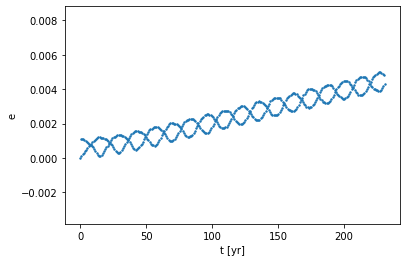

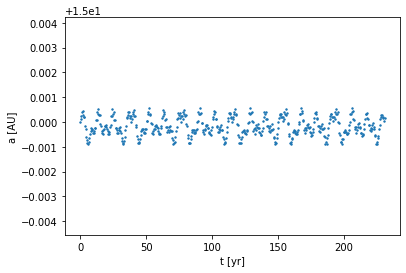

In [9]:
t_x = np.genfromtxt('moriwaki_u.txt',usecols=[0])/365.25
a_x = np.genfromtxt('moriwaki_u.txt',usecols=[1])
e_x = np.genfromtxt('moriwaki_u.txt',usecols=[2])

plt.scatter(t_x,e_x,s=2)
plt.xlabel('t [yr]')
plt.ylabel('e')
plt.show()

plt.scatter(t_x,a_x,s=2)
plt.xlabel('t [yr]')
plt.ylabel('a [AU]')
plt.show()

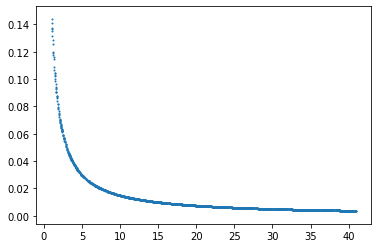

In [54]:
ep = [2*e_forced(i) for i in a_il]
plt.scatter(a_il,ep,s=1)

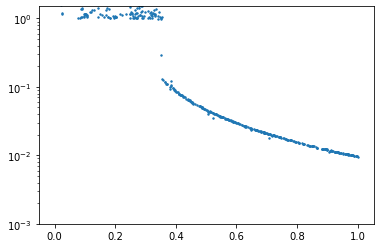

In [7]:
plt.scatter(a_l,e_l,s=2)
plt.ylim(1e-3,1.5)
plt.yscale('log')
# plt.xlim(0.37,0.43)
plt.show()